In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

decoder = models.Sequential([layers.InputLayer(input_shape=(64,)),
                             layers.Dense(7*7*64, activation='relu'),
                             layers.Reshape((7,7,64)),
                             layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
encoder.summary()
decoder.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 120s 247ms/step - loss: 0.2574 - val_loss: 0.0874
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 230ms/step - loss: 0.0845 - val_loss: 0.0770
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - loss: 0.0765 - val_loss: 0.0733
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - loss: 0.0733 - val_loss: 0.0716
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 224ms/step - loss: 0.0716 - val_loss: 0.0699
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 225ms/step - loss: 0.0701 - val_loss: 0.0694
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 224ms/step - loss: 0.0694 - val_loss: 0.0687
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 222ms/step - loss: 0.0688 - val_loss: 0.0680
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 222ms/step - loss: 0.0681 - val_loss: 0.0675
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 224ms/step - loss: 0.0677 - val_loss: 0.0672


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


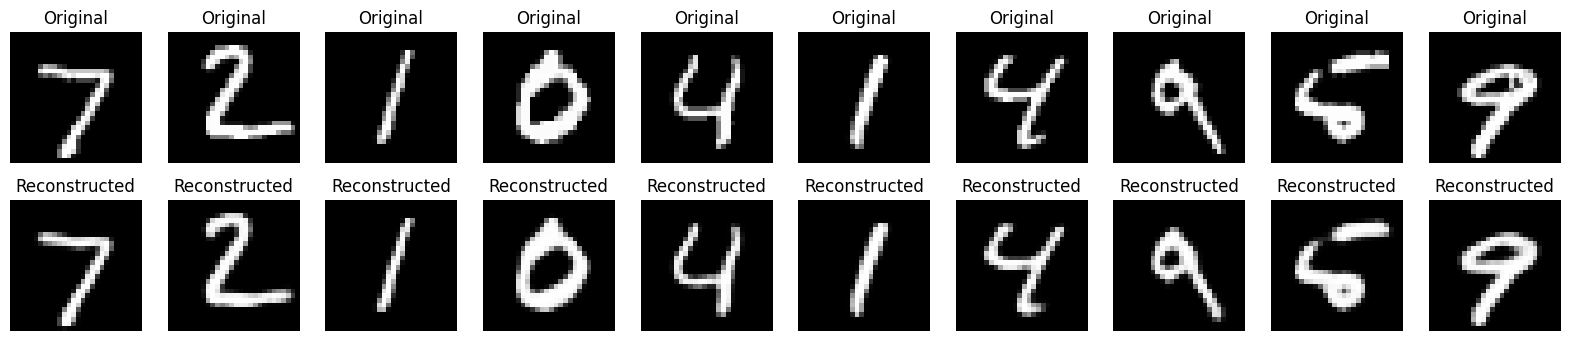

In [11]:
decoded_images = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()